# Project description

Working with the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms, and historical data on game sales are avaiable from open sources. Its needed to identify patterns that determine wether a game succeeds or not. This will allow to spot potential big winners and plan advertising campaigns.

# Libraries

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data

In [2]:
ds = pd.read_csv('../games.csv')

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
ds.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7331,Transformer: Rise of the Dark Spark,PS4,2014.0,Action,0.07,0.10,0.01,0.03,NaN,NaN,NaN
1435,MotorStorm: Pacific Rift,PS3,2008.0,Racing,0.43,0.65,0.02,0.25,82.0,8,T
14489,Code Lyoko: Quest for Infinity,PSP,2008.0,Action,0.03,0.00,0.00,0.00,NaN,tbd,E10+
4161,F.E.A.R. 2: Project Origin,PS3,2009.0,Shooter,0.19,0.20,0.01,0.08,79.0,7.9,M
9876,Major League Baseball 2K6,PSP,NaN,Sports,0.11,0.00,0.00,0.01,69.0,tbd,E
12669,The History Channel: Battle for the Pacific,X360,2007.0,Shooter,0.05,0.00,0.00,0.00,35.0,6.1,T
2754,Mortal Kombat: Unchained,PSP,2006.0,Fighting,0.67,0.01,0.00,0.06,70.0,8.8,M
15208,Pro Fishing Challenge,XB,2004.0,Sports,0.02,0.00,0.00,0.00,62.0,9.1,E
5915,Future Cop L.A.P.D.,PS,1997.0,Simulation,0.16,0.11,0.00,0.02,NaN,NaN,NaN
14387,A Good Librarian Like a Good Shepherd: Library...,PSV,2015.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
ds.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Preparing the Data

Setting up a copy of the data to work on that

In [6]:
df = ds.copy()

## Making the column names lowercase

In [7]:
columns = [a.lower() for a in df.keys()]
df.columns = columns

In [8]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Changing the columns datatype to the correct type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median())

In [11]:
df['year_of_release'] = df['year_of_release'].astype(int)

Changing the year of release column since it makes no sense for it to be a float, and the user score column since all user scores seem to range from 0 to 10. The rest of the columns seem to be of the correct type.

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
df[(df['user_score'] == 'tbd') & (df['year_of_release'] == 2016)].shape


(34, 11)

There seems to be that only 34 games from 2016 have a user score still to be determined. Im thinking they are so because of being recent releases at the moment the data was collected and not enough users had yet given their score. Although years before also have a similar amount of tbd games, only the ones from 2016 will be filled as the mean of the column. The rest will be treated as 0 when dealing with nan values further ahead

In [14]:
not_enough_data_mask = (df['user_score'] == 'tbd') & (df['year_of_release'] == 2016)
df.loc[not_enough_data_mask, 'user_score'] = 11

In [15]:
unpopular_mask = (df['user_score'] == 'tbd') & (df['year_of_release'] < 2016)
df.loc[unpopular_mask, 'user_score'] = 0

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', 11, '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

The user score value tbd (To Be Determined) will be considered as 0. It seems that the low popularity of those games had them unranked by the users. For the 2016 games the user rank will be the average of the column

In [18]:
df.loc[df['user_score']>10, 'user_score'] = df[(df['user_score']<10) & (df['user_score']>0)]['user_score'].median()

## Checking for duplicates

In [19]:
df[df.duplicated(keep='last')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


## Dealing with NaN

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


### Name column

In [21]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Dropping the NaN values since those two rows are highly uninformative

In [22]:
df = df.dropna(subset=['name'])

Checking again for NaN

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [24]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,10014.000000
mean,2006.494525,0.263302,0.145045,0.077625,0.047343,68.967679,5.425814
std,5.828405,0.813565,0.503359,0.308871,0.186742,13.938165,3.306888
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,2.800000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,6.900000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


### Critic score column

In [25]:
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())

C:\Users\Tirso\AppData\Local\Temp\ipykernel_7476\3082889487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


All the NaN in the column were filled with the median

### User score column

In [27]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,10014.000000
mean,2006.494525,0.263302,0.145045,0.077625,0.047343,70.010531,5.425814
std,5.828405,0.813565,0.503359,0.308871,0.186742,9.778073,3.306888
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,71.000000,2.800000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,6.900000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,71.000000,8.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [28]:
df['user_score'] = df['user_score'].fillna(df['user_score'].median())

C:\Users\Tirso\AppData\Local\Temp\ipykernel_7476\1931243227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_score'] = df['user_score'].fillna(df['user_score'].median())


All the NaN in the column were filled with the median

### Rating column

In [29]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [30]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


C:\Users\Tirso\AppData\Local\Temp\ipykernel_7476\1026040397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


All the NaN values in the rating column were filled with the mode of the column

## Feature Engineering

### Creating the total sales column

In [32]:
df['total_sales'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']

C:\Users\Tirso\AppData\Local\Temp\ipykernel_7476\1258182972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sales'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']


# Analyzing the Data

([<matplotlib.axis.XTick at 0x297157988d0>,
 [Text(1980, 0, '1980'),
  Text(1983, 0, '1983'),
  Text(1986, 0, '1986'),
  Text(1989, 0, '1989'),
  Text(1992, 0, '1992'),
  Text(1995, 0, '1995'),
  Text(1998, 0, '1998'),
  Text(2001, 0, '2001'),
  Text(2004, 0, '2004'),
  Text(2007, 0, '2007'),
  Text(2010, 0, '2010'),
  Text(2013, 0, '2013'),
  Text(2016, 0, '2016')])

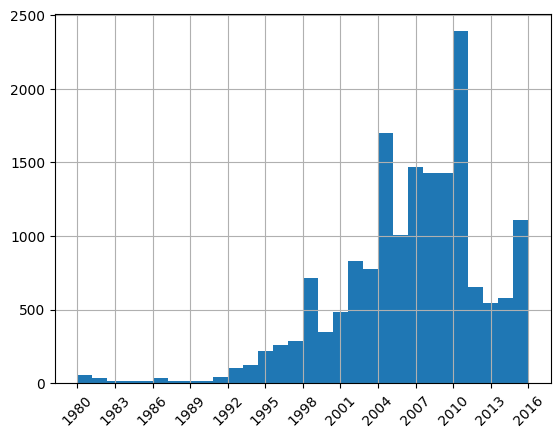

In [42]:
df['year_of_release'].hist(bins=30)
plt.xticks(range(df['year_of_release'].min(), df['year_of_release'].max() + 1, 3), rotation = 45)

The data for the release years seems mostly left skewed, meaning that most games were released after the 2000s. The highest peak can be seen after 2010, which preceded a downfall and then it seems to be going for another rise.

In [56]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).reset_index()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


<Figure size 1200x600 with 0 Axes>

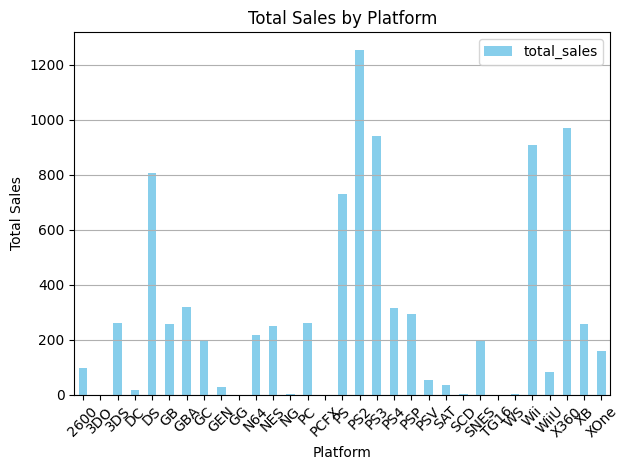

In [84]:
df_platform_sales = df.groupby('platform')['total_sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
df_platform_sales.plot(kind='bar', x='platform', y='total_sales', color='skyblue')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [81]:
yearly_sales = df.groupby('year_of_release')['total_sales'].sum()

([<matplotlib.axis.XTick at 0x29717e8a310>,
 [Text(1980, 0, '1980'),
  Text(1981, 0, '1981'),
  Text(1982, 0, '1982'),
  Text(1983, 0, '1983'),
  Text(1984, 0, '1984'),
  Text(1985, 0, '1985'),
  Text(1986, 0, '1986'),
  Text(1987, 0, '1987'),
  Text(1988, 0, '1988'),
  Text(1989, 0, '1989'),
  Text(1990, 0, '1990'),
  Text(1991, 0, '1991'),
  Text(1992, 0, '1992'),
  Text(1993, 0, '1993'),
  Text(1994, 0, '1994'),
  Text(1995, 0, '1995'),
  Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999'),
  Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016')])

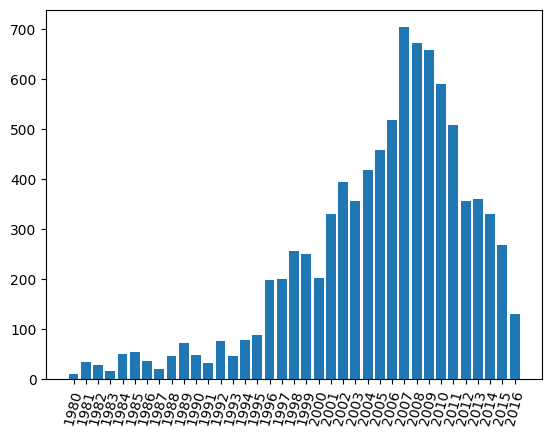

In [82]:
plt.bar(yearly_sales.reset_index()['year_of_release'], yearly_sales.reset_index()['total_sales'])
plt.xticks(range(yearly_sales.index[0], yearly_sales.index[-1]+1), rotation=75)

The sales per year seem to follow the same pattern as the releases, except for the last rise in releases which was not preceeded by an increase in sales, yet it may be due to lack of data being the last year data was recorded.